# Sheridan Kamal

## DATA 73500 - In Class Activity 4/20/20

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sb
import json
import math
import collections as cl
import matplotlib.pyplot as plt
!pip install boilerpipe3
from boilerpipe.extract import Extractor 
!pip install feedparser
import feedparser as fp
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('wordnet')
from nltk.corpus import wordnet as wn

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [0]:
FEED_URL = 'http://rss.cnn.com/rss/cnn_world.rss'
news_feed = fp.parse(FEED_URL)

In [3]:
news_feed_links = []
news_news = []
for item in news_feed.entries:
    news_feed_links.append(item.link)

print(news_feed_links)

for page in news_feed_links:
        extractor = Extractor(extractor = 'ArticleExtractor', url = page) 
        news_news.append(extractor.getText())

print(news_news)

['http://rss.cnn.com/~r/rss/cnn_world/~3/TfIfdhH0TBo/index.html', 'http://rss.cnn.com/~r/rss/cnn_world/~3/GekXPA0ioNU/index.html', 'http://rss.cnn.com/~r/rss/cnn_world/~3/cqdd14eLhQA/prince-harry-invictus-games-message-mxp-vpx.hln', 'http://rss.cnn.com/~r/rss/cnn_world/~3/rVY4TJhC3S4/index.html', 'http://rss.cnn.com/~r/rss/cnn_world/~3/iShlxDHexyA/index.html', 'http://rss.cnn.com/~r/rss/cnn_world/~3/PtPXbYPyfAs/index.html', 'http://rss.cnn.com/~r/rss/cnn_world/~3/Bt0Xd3nZ9ZU/index.html', 'http://rss.cnn.com/~r/rss/cnn_world/~3/owjjrP8UwDQ/index.html', 'http://rss.cnn.com/~r/rss/cnn_world/~3/P8KPxNFWjzk/index.html', 'http://rss.cnn.com/~r/rss/cnn_world/~3/WmsVukyQPa8/index.html', 'http://rss.cnn.com/~r/rss/cnn_world/~3/KlnsnygiAw8/index.html', 'http://rss.cnn.com/~r/rss/cnn_world/~3/pbQjkbD_bFk/index.html', 'http://rss.cnn.com/~r/rss/cnn_world/~3/Pa_SMoc1110/index.html', 'http://rss.cnn.com/~r/rss/cnn_world/~3/OO5HS1mWFP4/index.html', 'http://rss.cnn.com/~r/rss/cnn_world/~3/Y9WizT3J0Bo/

In [0]:
data = news_news

In [5]:
sentences = nltk.sent_tokenize(str(data))
tokens = nltk.word_tokenize(str(data))
print(len(sentences))
print(len(tokens))
print(sentences)
print(sorted(tokens))

669
30993
["['Updated 5:19 PM ET, Tue May 12, 2020\\nChat with us in Facebook Messenger.", 'Find out what\\\'s happening in the world as it unfolds.\\n(CNN)\\nThe Trump administration\\\'s peace deal with the Taliban was dealt yet another blow Tuesday as the Afghan government announced it was resuming offensive operations against the insurgent group following a spate of deadly terrorist attacks.\\nAfghanistan\\\'s President Ashraf Ghani announced the resumption of offensive operations during a televised address to the nation that took place in the wake of several deadly terrorist attacks , including one that targeted a maternity hospital that killed at least 13 people, including two newborn babies.\\n"I strongly condemn recent attacks on a hospital in Kabul and Nangarhar province which killed a number of innocent people including women and children," Ghani said Tuesday.\\nThe Taliban denied being responsible for the attack on the hospital and a second attack on a funeral procession tha

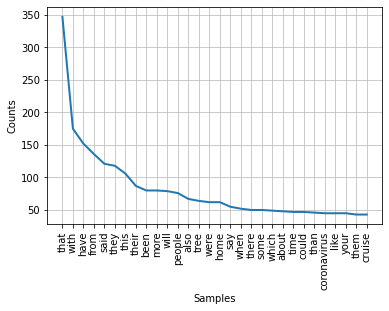

In [6]:
wnl = nltk.WordNetLemmatizer()
tokens2 = [t.lower() for t in tokens if len(t) > 3] 
lemma = [wnl.lemmatize(t) for t in tokens2]
news_lemma_freq = nltk.FreqDist(lemma)
news_lemma_freq.plot(30, cumulative=False)

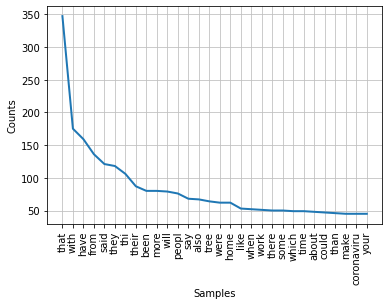

In [7]:
porter = nltk.PorterStemmer()
stems = [porter.stem(t) for t in tokens2]
news_stems_freq = nltk.FreqDist(stems)
news_stems_freq.plot(30, cumulative=False)

In [8]:
print(len(tokens2))

17210


In [0]:
words = lemma

In [0]:
COMFORT = set([
             'comfort', 'cheer', 'console', 'consolation', 'relief', 'solace' 
])

EXCITE = set([
              'excitement', 'excite', 'appetite', 'ardor', 'avid', 'desire', 
              'eagerness', 'enthusiasm', 'hunger', 'keenness', 'fun', 'thrill'
              'exhilarate', 'amuse', 'amusement'
])

ACCOMPLISH = set([
                  'accomplish', 'achieve', 'attain', 'success', 'triumph', 'succeed'
])

PEACE = set([
             'peace', 'calm', 'placid', 'serene', 'serenity', 'tranquillity', 
             'tranquility', 'content'
])

BEAUTY = set([
              'aesthetic', 'esthetic', 'attractive', 'beautiful', 'lovely', 
              'cute', 'gorgeous', 'handsome', 'pretty', 'elegant',
              'beauty'
])

EQUALITY = set([
                'evenhanded', 'fair-minded', 'impartial', 'justice', 'equality', 
                'equity', 'equitable', 'fair'
])

SECURITY = set([  
                'protect', 'safe', 'secure', 'security'
])

FREEDOM = set([
               'autonomy', 'independence', 'independent', 'liberty', 'self-determination', 
               'self-governance', 'self-government', 'sovereign', 'freedom', 'free'
])

HAPPINESS = set([
                 'bliss', 'felicity', 'glad', 'joy', 'happy', 'happiness' 
])

HARMONY = set([
               'comity', 'compatibility', 'compatible', 'concord', 'harmony', 'harmonious'
])

LOVE = set([
            'affection', 'attachment', 'devoted', 'devotion', 'passion',
             'fond', 'sweetheart', 'love', 'lover', 'girlfriend', 'boyfriend', 
            'husband', 'wife', 'marriage', 'married', 'wedding', 'honeymoon' 
])

PLEASURE = set([
               'delight', 'enjoyment', 'gladness', 'gratification', 'enjoy',
                'satisfaction', 'delightful', 'pleasure', 'pleasurable',
                'gratifying', 'sex', 'lust'
])

SALVATION = set([
                 'deliverance', 'rescue', 'saved', 'innocent', 'innocence', 'salvation'
                 'redeemed', 'atoned', 'blessed'
])

SELFRESPECT = set([
                   'ego', 'pride', 'prideful', 'self-regard', 'esteem', 'respect'
])

RECOGNITION = set([
                   'celebrity', 'notoriety', 'renown', 'fame', 'famous', 'respected', 
                   'popular', 'recognition', 'award-winning'
])

FRIENDSHIP = set([
                  'brotherhood', 'sisterhood', 'charity', 'cordiality', 
                  'fellowship', 'friendliness', 'goodwill', 'kindly', 
                  'neighborly', 'friend', 'friendship'
])

WISDOM = set([
              'discernment', 'insight', 'perception', 'perceptiveness', 'perceptivity', 
              'sagaciousness', 'sagacity', 'sapience', 'wisdom', 'wise'
])

term_values = ['comfort', 'excite', 'accomplish', 'peace', 'beauty', 'equality', 'security', 
          'freedom', 'happiness', 'harmony', 'love', 'pleasure', 'salvation', 
          'self respect', 'recognition', 'friendship', 'wisdom']

def terminal_count(words):
    comfort_freq = excite_freq = accomplish_freq = peace_freq = beauty_freq = equality_freq = security_freq = freedom_freq = happy_freq = harmony_freq = love_freq = pleasure_freq = salvation_freq = selfrespect_freq = recognition_freq = friendship_freq = wisdom_freq = 0

    for word in words:
        for term in COMFORT:
            if word.find(term) != -1: 
                comfort_freq += 1
        for term in EXCITE:
            if word.find(term) != -1:
                accomplish_freq += 1
        for term in ACCOMPLISH:
            if word.find(term) != -1:
                comfort_freq += 1
        for term in PEACE:
            if word.find(term) != -1:
                peace_freq += 1
        for term in BEAUTY:
            if word.find(term) != -1:
                beauty_freq += 1
        for term in EQUALITY:
            if word.find(term) != -1:
                equality_freq += 1
        for term in SECURITY:
            if word.find(term) != -1:
                security_freq += 1
        for term in FREEDOM:
            if word.find(term) != -1:
                freedom_freq += 1
        for term in HAPPINESS:
            if word.find(term) != -1:
                happy_freq += 1
        for term in HARMONY:
            if word.find(term) != -1:
                harmony_freq += 1
        for term in LOVE:
            if word.find(term) != -1:
                love_freq += 1
        for term in PLEASURE:
            if word.find(term) != -1:
                pleasure_freq += 1
        for term in SALVATION:
            if word.find(term) != -1:
                salvation_freq += 1
        for term in SELFRESPECT:
            if word.find(term) != -1:
                selfrespect_freq += 1
        for term in RECOGNITION:
            if word.find(term) != -1:
                recognition_freq += 1
        for term in FRIENDSHIP:
            if word.find(term) != -1:
                friendship_freq += 1
        for term in WISDOM:
            if word.find(term) != -1:
                wisdom_freq += 1

    valuefreqs = [comfort_freq, excite_freq,accomplish_freq, peace_freq, beauty_freq, 
                  equality_freq, security_freq, freedom_freq, happy_freq, harmony_freq, 
                  love_freq, pleasure_freq, salvation_freq, selfrespect_freq, 
                  recognition_freq, friendship_freq, wisdom_freq]

    return valuefreqs

In [0]:
AMBITIOUS = set([
                 'ambitious', 'ambition', 'striving', 'aspiring', 'go-getting', 'hard-driving', 
                 'self-seeking', 'determined', 'aspire', 'enterprising', 'industrious', 'competitive',
                 'ardent', 'assertive', 'opportunistic'
])

BROADMINDED = set([
                   'broad-minded', 'open-minded', 'liberal', 'nonjudgmental', 'tolerant', 
                   'nonconventional', 'nonorthodox', 'nontraditional', 'progressive', 
                   'radical', 'unconventional', 'unorthodox'
])

CAPABLE = set([
               'capable', 'competent', 'qualified', 'suitable', 'accomplished', 
               'adept', 'masterful', 'proficient', 'seasoned', 'skilled', 'skillful', 
               'prepared', 'well-prepared'
])

CHEERFUL = set([
                'cheerful', 'blithe', 'blithesome', 'bright', 'buoyant', 'cheery', 'chipper', 
                'eupeptic', 'gladsome', 'lightsome', 'sunny', 'upbeat', 'winsome'
])

CLEAN = set([
             'clean', 'chaste', 'immaculate', 'pristine', 'spotless', 'unsoiled', 'unstained', 
             'unsullied', 'decent', 'modest', 'healthy'
])

COURAGEOUS = set([
                  'courageous', 'bold', 'brave', 'dauntless', 'fearless', 
                  'gallant', 'greathearted', 'gutsy', 'heroic', 'intrepid', 
                  'lionhearted', 'manful', 'stalwart', 'stout', 'stouthearted', 
                  'undaunted', 'valiant', 'valorous'
])
            
FORGIVING = set([
                 'forgiving', 'caring', 'compassionate', 'considerate', 'cordial', 
                 'doting', 'friendly', 'humane', 'kind', 'understanding', 'warmhearted'
])

HELPFUL = set([
               'helpful', 'advantageous', 'beneficent', 'beneficial', 'benignant', 
               'favorable', 'kindly', 'salutary', 'kind', 'generous'
])

HONEST = set([
              'honest', 'truthful', 'veracious', 'candid', 'forthright', 'believable', 
              'credible', 'trustworthy', 'scrupulous'
])

IMAGINATIVE = set([
                   'imaginative', 'creative', 'arty', 'fanciful', 'clever', 'ingenious', 
                   'innovative', 'inventive', 'artful', 'artsy'
])

INDEPENDENT = set([
                   'independent', 'self-reliant', 'self-sufficient', 'self-supporting', 
                   'self-sustaining', 'autonomous', 'mature', 'sovereign'
])
            
INTELLECTUAL = set([
                    'intellectual', 'smart', 'cerebral', 'eggheaded', 'geeky', 'highbrow',
                    'erudite', 'learned', 'literate', 'polymath', 'scholarly', 'well-read',
                    'academic', 'bookish', 'professorial', 'didactic', 'pedantic', 
                    'educated', 'schooled'
])

LOGICAL = set([
               'logical', 'rational', 'analytical', 'coherent', 'reasonable', 'reasoned'
])

LOVING = set([
              'loving', 'affectionate', 'adoring', 'devoted', 'fond', 'tender', 
              'tenderhearted', 'caring', 'considerate', 'ardent', 'fervent', 
              'impassioned', 'passionate'
])

OBEDIENT = set([
                'obedient', 'amenable', 'biddable', 'compliant', 'conformable', 
                'docile', 'law-abiding', 'submissive', 'tractable', 'acquiescent',
                'yielding', 'tame', 'meek'
])

POLITE = set([
              'polite', 'civil', 'courteous', 'genteel', 'gracious', 'mannerly', 'well-bred',
              'solicitous'
])

RESPONSIBLE = set([
                   'responsible', 'dependable', 'reliable', 'accountable'
])
            
SELFCONTROL = set([
                   'self-control', 'restrained', 'sober', 'reserved', 'reticent', 
                   'levelheaded', 'pragmatic', 'sensible', 'steadfast', 'steady'
])

inst_values = ['ambitious', 'broadminded', 'capable', 'cheerful', 'clean', 'courageous', 
               'forgiving', 'helpful', 'honest', 'imaginative', 'independent', 
               'intellectual', 'logical', 'loving', 'obedient', 'polite', 'responsible', 'selfcontrol']

def instrumental_count(words):
    ambitious_freq = broadminded_freq = capable_freq = cheerful_freq = clean_freq = courageous_freq = forgiving_freq = helpful_freq = honest_freq = imaginative_freq = independent_freq = intellectual_freq = logical_freq = loving_freq = obedient_freq = polite_freq = responsible_freq = selfcontrol_freq = 0

    for word in words:
        for term in AMBITIOUS:
            if word.find(term) != -1: 
                ambitious_freq += 1
        for term in BROADMINDED:
            if word.find(term) != -1:
                broadminded_freq += 1
        for term in CAPABLE:
            if word.find(term) != -1:
                capable_freq += 1
        for term in CHEERFUL:
            if word.find(term) != -1:
                cheerful_freq += 1
        for term in CLEAN:
            if word.find(term) != -1:
                clean_freq += 1
        for term in COURAGEOUS:
            if word.find(term) != -1:
                courageous_freq += 1
        for term in FORGIVING:
            if word.find(term) != -1:
                forgiving_freq += 1
        for term in HELPFUL:
            if word.find(term) != -1:
                helpful_freq += 1
        for term in HONEST:
            if word.find(term) != -1:
                honest_freq += 1
        for term in IMAGINATIVE:
            if word.find(term) != -1:
                imaginative_freq += 1
        for term in INDEPENDENT:
            if word.find(term) != -1:
                independent_freq += 1
        for term in INTELLECTUAL:
            if word.find(term) != -1:
                intellectual_freq += 1
        for term in LOGICAL:
            if word.find(term) != -1:
                logical_freq += 1
        for term in LOVING:
            if word.find(term) != -1:
                loving_freq += 1
        for term in OBEDIENT:
            if word.find(term) != -1:
                obedient_freq += 1
        for term in POLITE:
            if word.find(term) != -1:
                polite_freq += 1
        for term in RESPONSIBLE:
            if word.find(term) != -1:
                responsible_freq += 1
        for term in SELFCONTROL:
            if word.find(term) != -1:
                selfcontrol_freq += 1

    valuefreqs = [ambitious_freq, broadminded_freq, capable_freq, cheerful_freq, clean_freq, 
                  courageous_freq, forgiving_freq, helpful_freq, honest_freq, imaginative_freq, 
                  independent_freq, intellectual_freq, logical_freq, loving_freq, 
                  obedient_freq, polite_freq, responsible_freq, selfcontrol_freq]

    return valuefreqs

In [0]:
ASSERTIVE_TERMS = set([
                    'am', 'are', 'is', 'was', 'were', 'affirm',
                    'allege', 'assert', 'forecast', 'predict', 'announce',
                    'insist', 'declare', 'state', 'propose',
                    'propound', 'maintain', 'contend', 'avow', 'warrant',
                    'believe', 'argue', 'aver', 'avouch', 'guarantee', 'profess',
                    'plead', 'reason', 'purport', 'claim', 'explain', 'proclaim' 
])
DIRECTIVE_TERMS = set([
                    'command', 'demand', 'forbid', 'recommend', 'order',
                    'decree', 'enact', 'direct', 'enjoin', 'instruct',
                    'compel', 'prohibit', 'dictate', 'require', 'mandate',
                    'require'
])
COMMISSIVE_TERMS = set([
                    'offer', 'promise', 'swear', 'volunteer', 'vow', 'pledge',
                    'attest', 'engage', 'troth'
])
EVALUATIVE_TERMS = set([
                     'thank', 'congratulate', 'pardon', 'excuse', 'blame', 
                     'praise', 'condolence', 'accuse', 'apologize',
                     'commiserate', 'approve', 'admire', 'commend', 'compliment',
                     'applaud',  'object', 'lament', 'condemn', 'admonish',
                     'reprove', 'rebuke', 'chastise', 'impeach', 'denounce',
                     'bless', 'glorify', 'acclaim', 'cheer', 'salute', 'censure',
                     'excoriate', 'chide', 'castigate', 'scold', 'reprehend',
])
ROGATIVE_TERMS = set([
                      'ask', 'inquire', 'question', 'query', 'beg', 'request',
                      'implore', 'beseech', 'petition', 'solicit', 'entreat',
                      'supplicate'
])

illact_labels = ['assertive', 'directive', 'commissive', 'evaluative', 'rogative']

def illact_count(words):
    assertive_freq = directive_freq = commissive_freq = evaluative_freq = rogative_freq = 0

    for word in words:
        for term in ASSERTIVE_TERMS:
            if word.find(term) != -1:
                assertive_freq += 1
        for term in DIRECTIVE_TERMS:
            if word.find(term) != -1:
                directive_freq += 1
        for term in COMMISSIVE_TERMS:
            if word.find(term) != -1:
                commissive_freq += 1
        for term in EVALUATIVE_TERMS:
            if word.find(term) != -1:
                evaluative_freq += 1
        for term in ROGATIVE_TERMS:
            if word.find(term) != -1:
                rogative_freq += 1

    illacts_freqs = [assertive_freq, directive_freq, commissive_freq, evaluative_freq, rogative_freq]

    return illacts_freqs

In [0]:
data_keywords = set(['health', 'safety', 'politics', 'economy', 'community'])
data_labels = list(data_keywords)
keywords = {}

for term in data_keywords:
    for synset in wn.synsets(term):
        keywords[term] = synset.lemma_names()

keywords_keys = list(keywords.keys())
keyword_counts = {}

def wn_keyword_count(words):
    for key in keywords_keys:
        keyword_counts[key] = 0
    
    for word in words:
        for key in keywords_keys:
            for term in keywords[key]:
                if word.find(term) != -1:
                    keyword_counts[key] += 1

    return keyword_counts

In [14]:
data_keywords = set(['health', 'safety', 'politics', 'economy', 'community'])
data_labels = list(data_keywords)

health_synonyms = []
health_antonyms = []

for syn in wn.synsets('health'):
    for l in syn.lemmas():
        health_synonyms.append(l.name())
        if l.antonyms():
            health_antonyms.append(l.antonyms()[0].name())

if len(health_synonyms) > 0:
    if len(health_antonyms) > 0:
        health_terms = health_synonyms + health_antonyms
    elif len(health_antonyms) == 0: 
        health_terms = health_synonyms
else: health_terms = ['health']

safety_synonyms = []
safety_antonyms = []

for syn in wn.synsets('safety'):
    for l in syn.lemmas():
        safety_synonyms.append(l.name())
        if l.antonyms():
            safety_antonyms.append(l.antonyms()[0].name())

if len(safety_synonyms) > 0:
    if len(safety_antonyms) > 0:
        safety_terms = safety_synonyms + safety_antonyms
    elif len(safety_antonyms) == 0: 
        safety_terms = safety_synonyms
else: safety_terms = ['safety']

politics_synonyms = []
politics_antonyms = []

for syn in wn.synsets('politics'):
    for l in syn.lemmas():
        politics_synonyms.append(l.name())
        if l.antonyms():
            politics_antonyms.append(l.antonyms()[0].name())

if len(politics_synonyms) > 0:
    if len(politics_antonyms) > 0:
        politics_terms = politics_synonyms + politics_antonyms
    elif len(politics_antonyms) == 0: 
        politics_terms = politics_synonyms
else: politics_terms = ['politics']

economy_synonyms = []
economy_antonyms = []

for syn in wn.synsets('economy'):
    for l in syn.lemmas():
        economy_synonyms.append(l.name())
        if l.antonyms():
            economy_antonyms.append(l.antonyms()[0].name())

if len(economy_synonyms) > 0:
    if len(economy_antonyms) > 0:
        economy_terms = economy_synonyms + economy_antonyms
    elif len(economy_antonyms) == 0: 
        economy_terms = economy_synonyms
else: economy_terms = ['economy']

community_synonyms = []
community_antonyms = []

for syn in wn.synsets('community'):
    for l in syn.lemmas():
        community_synonyms.append(l.name())
        if l.antonyms():
            community_antonyms.append(l.antonyms()[0].name())

if len(community_synonyms) > 0:
    if len(community_antonyms) > 0:
        community_terms = community_synonyms + community_antonyms
    elif len(community_antonyms) == 0: 
        community_terms = community_synonyms
else: community_terms = ['community']

health_terms = set(health_terms)
safety_terms = set(safety_terms)
politics_terms = set(politics_terms)
economy_terms = set(economy_terms)
community_terms = set(community_terms)

print(health_terms)
print(safety_terms)
print(politics_terms)
print(economy_terms)
print(community_terms)

def wn_keyword_count2(words):
    health_freq = safety_freq = politics_freq = economy_freq = community_freq = 0

    for word in words:
        for term in health_terms:
            if word.find(term) != -1:
                health_freq += 1

        for term in safety_terms:
            if word.find(term) != -1:
                safety_freq += 1

        for term in politics_terms:
            if word.find(term) != -1:
                politics_freq += 1

        for term in economy_terms:
            if word.find(term) != -1:
                economy_freq += 1

        for term in community_terms:
            if word.find(term) != -1:
                community_freq += 1

    theme_freqs = [health_freq, safety_freq, politics_freq, economy_freq, community_freq]

    return theme_freqs

{'illness', 'health', 'wellness'}
{'danger', 'safety_device', 'prophylactic', 'refuge', 'safety', 'rubber', 'safe', 'guard', 'condom', 'base_hit'}
{'political_sympathies', 'political_science', 'political_relation', 'government', 'politics'}
{'thriftiness', 'saving', 'economic_system', 'economy'}
{'biotic_community', 'community', 'residential_area', 'residential_district', 'community_of_interests'}


In [15]:
print(len(words))
print(words)

results0 = pd.Series(terminal_count(words), index=term_values)
results1 = pd.Series(instrumental_count(words), index=inst_values)
results2 = pd.Series(illact_count(words), index=illact_labels)
results3 = pd.Series(wn_keyword_count(words), index=data_labels)
results4 = pd.Series(wn_keyword_count2(words), index=data_labels)

print(results0)
print(results1)
print(results2)
print(results3)
print(results4)

17210
["'updated", '5:19', '2020\\nchat', 'with', 'facebook', 'messenger', 'find', 'what\\', 'happening', 'world', 'unfolds.\\n', '\\nthe', 'trump', 'administration\\', 'peace', 'deal', 'with', 'taliban', 'dealt', 'another', 'blow', 'tuesday', 'afghan', 'government', 'announced', 'resuming', 'offensive', 'operation', 'against', 'insurgent', 'group', 'following', 'spate', 'deadly', 'terrorist', 'attacks.\\nafghanistan\\', 'president', 'ashraf', 'ghani', 'announced', 'resumption', 'offensive', 'operation', 'during', 'televised', 'address', 'nation', 'that', 'took', 'place', 'wake', 'several', 'deadly', 'terrorist', 'attack', 'including', 'that', 'targeted', 'maternity', 'hospital', 'that', 'killed', 'least', 'people', 'including', 'newborn', 'babies.\\n', 'strongly', 'condemn', 'recent', 'attack', 'hospital', 'kabul', 'nangarhar', 'province', 'which', 'killed', 'number', 'innocent', 'people', 'including', 'woman', 'child', 'ghani', 'said', 'tuesday.\\nthe', 'taliban', 'denied', 'being', 

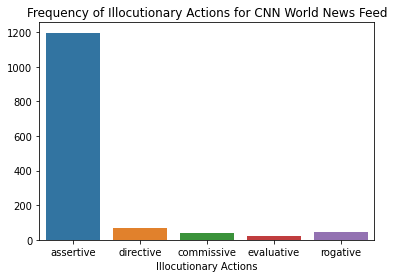

In [16]:
plt.plot()
plt.xlabel('Illocutionary Actions')
plt.title('Frequency of Illocutionary Actions for CNN World News Feed')
sb.barplot(x=illact_labels, y=results2)

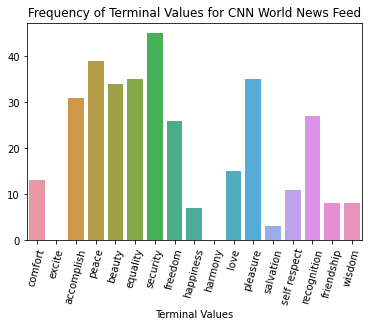

In [17]:
plt.plot()
plt.xlabel('Terminal Values')
plt.title('Frequency of Terminal Values for CNN World News Feed')
plt.xticks(rotation=75)
sb.barplot(x=term_values, y=results0)

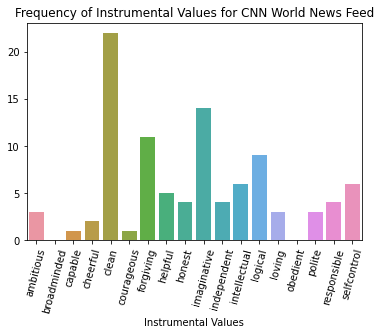

In [18]:
plt.plot()
plt.xlabel('Instrumental Values')
plt.title('Frequency of Instrumental Values for CNN World News Feed')
plt.xticks(rotation=75)
sb.barplot(x=inst_values, y=results1)

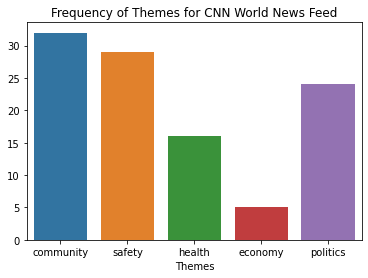

In [19]:
plt.figure() 
plt.xlabel('Themes')
plt.title('Frequency of Themes for CNN World News Feed')
sb.barplot(x=data_labels, y=results4)